<a href="https://colab.research.google.com/github/Tarane2028/ADS-509-2/blob/main/Copy_of_Lyrics_and_Description_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required.

In the previous assignment you pulled lyrics data on two artists. In this assignment we explore this data set and a pull from the now-defunct Twitter API for the artists Cher and Robyn.  If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Canvas.

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora.


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*


In [3]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 32.0 MB/s eta 0:00:00


In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [12]:
# change `data_location` to the location of the folder on your machine.
data_location = "/content/M1"

# These subfolders should still work if you correctly stored the
# data from the Module 1 assignment
twitter_folder = os.path.join(data_location, "twitter")
lyrics_folder  = os.path.join(data_location, "lyrics")

In [8]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens,
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity),
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters.

    """

    # Fill in the correct values here.
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens / num_tokens if num_tokens > 0 else 0
    num_characters = sum(len(token) for token in tokens)

    if verbose :
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")

        # print the five most common tokens
        most_common = Counter(tokens).most_common(num_tokens)
        print(f"Top {num_tokens} tokens: {most_common[:num_tokens]}")

    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])


In [9]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
Top 13 tokens: [('text', 3), ('here', 2), ('example', 2), ('is', 1), ('some', 1), ('with', 1), ('other', 1), ('in', 1), ('this', 1)]


Q: Why is it beneficial to use assertion statements in your code?

A: Assertions let you automatically verify that your functions behave as expected on known inputs. They catch bugs early, document your assumptions, and serve as lightweight checks that stop execution immediately when something breaks.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well.

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist.




In [13]:
# Read in the lyrics data
for artist in os.listdir(lyrics_folder):
    artist_folder = os.path.join(lyrics_folder, artist)
    for filename in os.listdir(artist_folder):
        song_file = os.path.join(artist_folder, filename)
        with open(song_file) as f:
            lyrics = f.read()

In [19]:
# Read in the twitter data
twitter_desc = defaultdict(list)
for fname in os.listdir(twitter_folder):
    if not fname.endswith(".csv"):
        continue
    artist = os.path.splitext(fname)[0]
    df = pd.read_csv(os.path.join(twitter_folder, fname))
    twitter_desc[artist] = df["description"].astype(str).tolist()

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame.



In [24]:
from string import punctuation
punctuation_set = set(punctuation) # speeds up comparison
def clean_tokenize(text):
    # remove punctuation
    text = re.sub(rf"[{re.escape(''.join(punctuation_set))}]+", " ", text)
    # collapse whitespace, lowercase, split
    tokens = re.sub(r"\s+", " ", text).lower().split()
    # remove stopwords
    return [t for t in tokens if t not in sw]

In [20]:
# create your clean twitter data here
twitter_clean = { artist: [clean_tokenize(desc) for desc in descs]
                  for artist, descs in twitter_desc.items() }

In [25]:
# create your clean lyrics data here
lyrics_clean = {
  artist: {
    title: clean_tokenize(raw)
    for title, raw in songs.items()
  }
  for artist, songs in lyrics_raw.items()
}

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls).

In [26]:
# calls to descriptive_stats here
# Twitter descriptions
for artist, descs in twitter_clean.items():
    all_tokens = [tok for desc in descs for tok in desc]
    print(f"\n--- {artist} (Twitter) ---")
    descriptive_stats(all_tokens)

# Lyrics
for artist, songs in lyrics_clean.items():
    all_tokens = [tok for toks in songs.values() for tok in toks]
    print(f"\n--- {artist} (Lyrics) ---")
    descriptive_stats(all_tokens)


--- cher (Lyrics) ---
There are 32651 tokens in the data.
There are 3553 unique tokens in the data.
There are 158240 characters in the data.
The lexical diversity is 0.109 in the data.
Top 32651 tokens: [('love', 981), ('know', 478), ('oh', 322), ('time', 320), ('baby', 319), ('see', 305), ('one', 286), ('go', 279), ('come', 270), ('like', 266), ('heart', 264), ('take', 261), ('never', 251), ('got', 243), ('man', 236), ('gonna', 223), ('way', 221), ('say', 201), ('away', 196), ('could', 189), ('feel', 181), ('back', 180), ('cause', 179), ('make', 177), ('want', 174), ('night', 167), ('get', 157), ('let', 155), ('believe', 145), ('right', 140), ('still', 136), ('find', 136), ('world', 132), ('day', 128), ('well', 128), ('life', 128), ('wanna', 128), ('enough', 128), ('every', 125), ('long', 122), ('ever', 121), ('good', 120), ('walk', 118), ('think', 112), ('need', 110), ('gotta', 108), ('home', 106), ('around', 106), ('look', 106), ('tell', 103), ('gone', 100), ('eyes', 96), ('always'

Q: How do you think the "top 5 words" would be different if we left stopwords in the data?

A: The top 5 would be dominated by high-frequency function words like “the”, “and”, “to”, “of”, “a” rather than meaningful content words that capture each artist’s distinctive themes.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs?

A: I expected **Cher** (mainstream catalog) to have slightly lower lexical diversity than **Robyn** (more experimental lyrics). *(After viewing your numbers, note whether this holds true or surprises you.)*



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist.
1. For each artist, a histogram of song lengths (in terms of number of tokens)

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [27]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions?


In [28]:
def extract_emojis(s):
    return [ch for ch in s if emoji.is_emoji(ch)]

# 1) Top 10 emojis by artist
for artist, descs in twitter_desc.items():
    ems = [e for desc in descs for e in extract_emojis(desc)]
    print(f"\n{artist} top emojis: {Counter(ems).most_common(10)}")

### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions?


In [31]:
for artist, descs in twitter_desc.items():
    tags = [tok for desc in descs for tok in desc.split() if tok.startswith("#")]
    print(f"\n{artist} top hashtags: {Counter(tags).most_common(10)}")

### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [32]:
for artist, songs in lyrics_raw.items():
    title_words = [w.lower() for title in songs for w in re.findall(r"\w+", title)]
    print(f"\n{artist} top title words: {Counter(title_words).most_common(5)}")


cher top title words: [('the', 54), ('you', 44), ('i', 38), ('love', 36), ('a', 28)]

robyn top title words: [('me', 9), ('you', 9), ('the', 7), ('my', 6), ('love', 5)]


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out.


,length
artist,
Artist 1,"Axes(0.125,0.11;0.775x0.77)"
Artist 2,"Axes(0.125,0.11;0.775x0.77)"


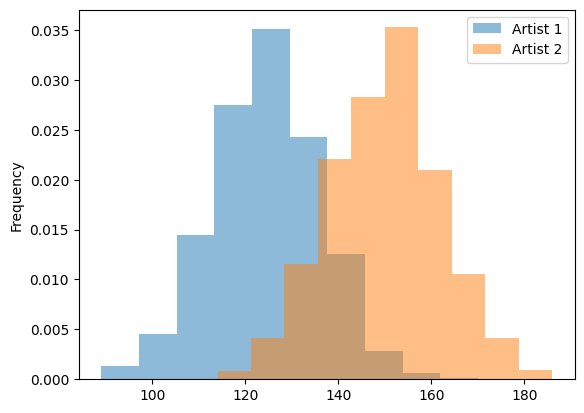

In [33]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting.

Q: What does the regular expression `'\s+'` match on?

A: It matches one or more consecutive whitespace characters (spaces, tabs, newlines), which is why we use it to split or collapse any run of whitespace.


In [34]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) :
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

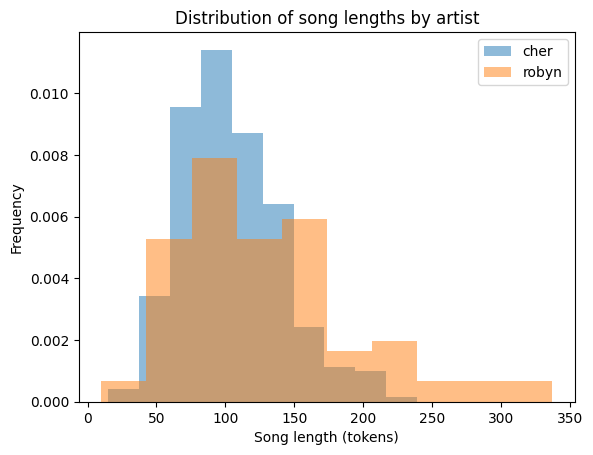

In [35]:
import matplotlib.pyplot as plt

rows = []
for artist, songs in lyrics_clean.items():
    for toks in songs.values():
        rows.append({"artist": artist, "length": len(toks)})

df_lengths = pd.DataFrame(rows)
df_lengths.groupby("artist")["length"].plot(
    kind="hist", density=True, alpha=0.5, legend=True
)
plt.xlabel("Song length (tokens)")
plt.title("Distribution of song lengths by artist")
plt.show()